In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
mobike=pd.read_csv('week4.mobike.csv')

In [4]:
mobike.describe()

,Unnamed: 0,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear
count,6427.000000,6.427000e+03,6427.000000,6427.000000,6.427000e+03,6427.000000,6427.000000,5956.000000
mean,317005.228411,2.135519e+07,11.778902,3491.637934,1.060471e+03,195.038432,198.502567,1982.488583
std,184583.896111,2.181294e+05,9.692236,1912.171846,1.456811e+04,148.170025,148.939873,11.147859
min,51.000000,2.098358e+07,0.000000,2.000000,6.100000e+01,2.000000,2.000000,1906.000000
25%,159093.000000,2.116805e+07,5.000000,1852.000000,3.490000e+02,77.000000,80.000000,1977.000000
50%,314569.000000,2.135114e+07,9.000000,3618.000000,5.590000e+02,168.000000,172.000000,1986.000000
75%,476273.500000,2.154376e+07,15.000000,5179.500000,9.320000e+02,287.000000,287.000000,1991.000000
max,642522.000000,2.174223e+07,59.000000,6470.000000,1.139070e+06,662.000000,661.000000,2002.000000


In [5]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 15 columns):
Unnamed: 0           6427 non-null int64
user_id              6427 non-null int64
start_time           6427 non-null object
end_time             6427 non-null object
timeduration         6427 non-null int64
bikeid               6427 non-null int64
tripduration         6427 non-null int64
from_station_id      6427 non-null int64
from_station_name    6427 non-null object
to_station_id        6427 non-null int64
to_station_name      6427 non-null object
usertype             6427 non-null object
gender               5938 non-null object
birthyear            5956 non-null float64
age                  6427 non-null object
dtypes: float64(1), int64(7), object(7)
memory usage: 753.3+ KB


In [14]:
mobike.head()

,Unnamed: 0,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,439283,21499218,2018-11-14 07:37:00,2018-11-14 07:44:00,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
1,603317,21694389,2018-12-18 19:02:00,2018-12-18 19:10:00,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
2,109957,21110722,2018-10-09 12:37:00,2018-10-09 12:55:00,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
3,428082,21485409,2018-11-12 12:30:00,2018-11-12 12:40:00,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
4,395437,21445994,2018-11-07 07:29:00,2018-11-07 07:35:00,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [17]:
#有缺失值gender
#填充gender
mobike.gender.unique()


array(['Male', 'Female', nan], dtype=object)

In [18]:
mobike['gender']=mobike['gender'].fillna('Unknown')

In [20]:
#转换age变成数字型变量
mobike.age=pd.to_numeric(mobike.age, errors='coerce')

In [21]:
mobike.describe()

,Unnamed: 0,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear,age
count,6427.000000,6.427000e+03,6427.000000,6427.000000,6.427000e+03,6427.000000,6427.000000,5956.000000,5956.000000
mean,317005.228411,2.135519e+07,11.778902,3491.637934,1.060471e+03,195.038432,198.502567,1982.488583,36.511417
std,184583.896111,2.181294e+05,9.692236,1912.171846,1.456811e+04,148.170025,148.939873,11.147859,11.147859
min,51.000000,2.098358e+07,0.000000,2.000000,6.100000e+01,2.000000,2.000000,1906.000000,17.000000
25%,159093.000000,2.116805e+07,5.000000,1852.000000,3.490000e+02,77.000000,80.000000,1977.000000,28.000000
50%,314569.000000,2.135114e+07,9.000000,3618.000000,5.590000e+02,168.000000,172.000000,1986.000000,33.000000
75%,476273.500000,2.154376e+07,15.000000,5179.500000,9.320000e+02,287.000000,287.000000,1991.000000,42.000000
max,642522.000000,2.174223e+07,59.000000,6470.000000,1.139070e+06,662.000000,661.000000,2002.000000,113.000000


In [22]:
#age有异常值
mobike=mobike[mobike['age']<80]

In [23]:
mobike.tripduration.describe()

count      5953.000000
mean        793.149001
std        3330.248759
min          61.000000
25%         339.000000
50%         528.000000
75%         857.000000
max      233732.000000
Name: tripduration, dtype: float64

In [25]:
#tripduration也有异常值
mobike=mobike[mobike['tripduration']<5000]

In [26]:
#将几个日期时间变成日期格式
mobike.start_time=pd.to_datetime(mobike.start_time)
mobike.end_time=pd.to_datetime(mobike.end_time)

D:\anaconda\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6426
Data columns (total 15 columns):
Unnamed: 0           5917 non-null int64
user_id              5917 non-null int64
start_time           5917 non-null datetime64[ns]
end_time             5917 non-null datetime64[ns]
timeduration         5917 non-null int64
bikeid               5917 non-null int64
tripduration         5917 non-null int64
from_station_id      5917 non-null int64
from_station_name    5917 non-null object
to_station_id        5917 non-null int64
to_station_name      5917 non-null object
usertype             5917 non-null object
gender               5917 non-null object
birthyear            5917 non-null float64
age                  5917 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(7), object(4)
memory usage: 899.6+ KB


In [28]:
#哑变量处理
mobike = pd.get_dummies(mobike)

In [29]:
mobike.head()

,Unnamed: 0,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear,...,to_station_name_Wood St & Hubbard St,to_station_name_Wood St & Milwaukee Ave,to_station_name_Wood St & Taylor St,to_station_name_Woodlawn Ave & 55th St,to_station_name_Woodlawn Ave & Lake Park Ave,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male,gender_Unknown
0,439283,21499218,2018-11-14 07:37:00,2018-11-14 07:44:00,7,2631,436,319,67,1982.0,...,0,0,0,0,0,0,1,0,1,0
1,603317,21694389,2018-12-18 19:02:00,2018-12-18 19:10:00,7,1565,445,164,195,1988.0,...,0,0,0,0,0,0,1,0,1,0
2,109957,21110722,2018-10-09 12:37:00,2018-10-09 12:55:00,18,2231,1090,163,69,1989.0,...,0,0,0,0,0,1,0,0,1,0
3,428082,21485409,2018-11-12 12:30:00,2018-11-12 12:40:00,9,4226,581,226,308,1989.0,...,0,0,0,0,0,0,1,1,0,0
4,395437,21445994,2018-11-07 07:29:00,2018-11-07 07:35:00,6,3475,390,77,621,1979.0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
mobike.drop(['Unnamed: 0','user_id','usertype_Subscriber','gender_Female'],axis=1,inplace=True)

In [34]:
mobike.corr()

,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear,age,from_station_name_900 W Harrison St,from_station_name_Aberdeen St & Jackson Blvd,from_station_name_Aberdeen St & Monroe St,...,to_station_name_Wood St & Augusta Blvd,to_station_name_Wood St & Chicago Ave (*),to_station_name_Wood St & Hubbard St,to_station_name_Wood St & Milwaukee Ave,to_station_name_Wood St & Taylor St,to_station_name_Woodlawn Ave & 55th St,to_station_name_Woodlawn Ave & Lake Park Ave,usertype_Customer,gender_Male,gender_Unknown
timeduration,1.000000,-0.009739,0.926187,0.034548,0.031754,-0.032677,0.032677,-0.008849,-0.008207,-0.003176,...,-0.013836,0.019999,0.009685,0.011857,-0.001109,-0.008369,0.027711,0.185269,-0.058316,0.042665
bikeid,-0.009739,1.000000,-0.015652,-0.016225,0.013922,-0.017576,0.017576,-0.016817,0.024975,-0.007690,...,0.013481,0.003622,0.002733,0.003776,0.015446,0.029618,-0.027609,-0.010767,0.015103,-0.005529
tripduration,0.926187,-0.015652,1.000000,0.023613,0.031540,-0.031661,0.031661,-0.008514,-0.009243,-0.003583,...,-0.014621,0.017606,0.008043,0.011004,-0.001626,-0.009494,0.025289,0.252883,-0.062056,0.060186
from_station_id,0.034548,-0.016225,0.023613,1.000000,0.268769,0.026385,-0.026385,-0.025662,-0.075889,-0.049384,...,0.002137,-0.000002,0.003967,-0.013400,0.036916,0.044504,0.019628,-0.006117,-0.031071,0.011709
to_station_id,0.031754,0.013922,0.031540,0.268769,1.000000,0.019088,-0.019088,0.005232,-0.044493,-0.013122,...,0.119869,0.101063,0.016483,-0.047451,0.030530,0.013711,0.026268,-0.012261,-0.046818,-0.003800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
to_station_name_Woodlawn Ave & 55th St,-0.008369,0.029618,-0.009494,0.044504,0.013711,0.013199,-0.013199,-0.001863,-0.002754,-0.002696,...,-0.001684,-0.001485,-0.001255,-0.002176,-0.001684,1.000000,-0.000794,-0.007925,-0.014872,-0.002317
to_station_name_Woodlawn Ave & Lake Park Ave,0.027711,-0.027609,0.025289,0.019628,0.026268,-0.008390,0.008390,-0.000794,-0.001173,-0.001149,...,-0.000718,-0.000633,-0.000535,-0.000927,-0.000718,-0.000794,1.000000,-0.003376,-0.012383,-0.000987
usertype_Customer,0.185269,-0.010767,0.252883,-0.006117,-0.012261,0.048618,-0.048618,0.014162,0.003251,-0.011471,...,-0.007167,-0.006320,-0.005340,-0.009257,-0.007167,-0.007925,-0.003376,1.000000,-0.019272,0.025694
gender_Male,-0.058316,0.015103,-0.062056,-0.031071,-0.046818,-0.072645,0.072645,0.013508,-0.004505,0.007050,...,0.010315,-0.029103,0.001453,-0.013689,-0.000141,-0.014872,-0.012383,-0.019272,1.000000,-0.100861


In [65]:
#选择要分析的关键变量存入X中
data=mobike[['timeduration','tripduration','age','usertype_Customer','gender_Male']]
data.corr()

,timeduration,tripduration,age,usertype_Customer,gender_Male
timeduration,1.000000,0.926187,0.032677,0.185269,-0.058316
tripduration,0.926187,1.000000,0.031661,0.252883,-0.062056
age,0.032677,0.031661,1.000000,-0.048618,0.072645
usertype_Customer,0.185269,0.252883,-0.048618,1.000000,-0.019272
gender_Male,-0.058316,-0.062056,0.072645,-0.019272,1.000000


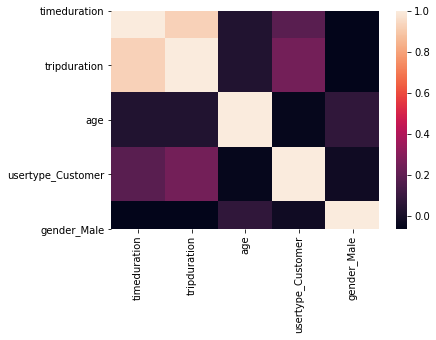

In [66]:
sns.heatmap(data.corr())

In [67]:
#建立聚类模型
from sklearn.preprocessing import scale
x=pd.DataFrame(scale(data))

In [80]:
#建立分类为5的聚类模型x
from sklearn import cluster
model=cluster.KMeans(n_clusters=5,random_state=10)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [81]:
data['cluster']=model.labels_
data.head(20)#查看分类的结果

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,timeduration,tripduration,age,usertype_Customer,gender_Male,cluster
0,7,436,37.0,0,1,1
1,7,445,31.0,0,1,1
2,18,1090,30.0,1,1,4
3,9,581,30.0,0,0,2
4,6,390,40.0,0,1,1
5,12,772,25.0,0,1,1
6,8,505,48.0,0,0,2
8,13,819,28.0,0,1,1
9,3,225,30.0,0,1,1
10,16,973,27.0,0,1,1


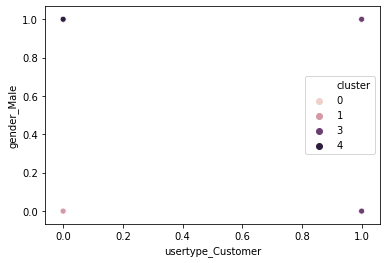

In [70]:
sns.scatterplot(x='usertype_Customer',y='gender_Male',hue='cluster',data=data)

In [71]:
data.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,727.0,36.042641,9.685956,18.0,29.0,34.0,40.0,73.0
1,1105.0,34.648869,9.872088,18.0,28.0,31.0,39.0,62.0
2,1074.0,53.186220,7.365872,41.0,47.0,52.0,58.0,79.0
3,193.0,33.544041,10.580021,18.0,25.0,30.0,39.0,63.0
4,2818.0,31.114620,5.283781,17.0,27.0,31.0,35.0,43.0


In [72]:
#年龄的区分度弱，换成gender_Male
data.groupby(['cluster'])['gender_Male'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,727.0,0.810179,0.392430,0.0,1.0,1.0,1.0,1.0
1,1105.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,1074.0,0.988827,0.105160,0.0,1.0,1.0,1.0,1.0
3,193.0,0.735751,0.442079,0.0,0.0,1.0,1.0,1.0
4,2818.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [73]:
#换成性别区分度强些

In [82]:
#调用sklearn的metrics库
from sklearn import metrics 
#给每个样本预测类别
x_cluster=model.fit_predict(x) 
#调用子模块metrics中的silhouette_score函数，计算轮廓系数
score=metrics.silhouette_score(x,x_cluster) 
print(score)

0.5556350234469354


In [79]:
#优化模型，分4类试试
#建立聚类模型
from sklearn.preprocessing import scale
x=pd.DataFrame(scale(data))
#建立分类为4的聚类模型x
from sklearn import cluster
model=cluster.KMeans(n_clusters=4,random_state=10)
model.fit(x)
data['cluster']=model.labels_
#调用sklearn的metrics库
from sklearn import metrics 
#给每个样本预测类别
x_cluster=model.fit_predict(x) 
#调用子模块metrics中的silhouette_score函数，计算轮廓系数
score=metrics.silhouette_score(x,x_cluster) 
print(score)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0.4310691051708183


In [83]:
#轮廓系数下降，不如原来分五类
#导出分析分五类的
centers = pd.DataFrame(model.cluster_centers_)
centers.to_csv('center_5.csv')

In [78]:
mobike['cluster']=model.labels_
mobike['cluster'].value_counts(1)

1    0.476255
2    0.186750
3    0.181511
0    0.122866
4    0.032618
Name: cluster, dtype: float64

In [ ]:
#总结
# 1，2两类的客户占据接近70%的客户，4客户群最少
# 0类骑行时x长，1类属于customer占比最多，2类不是customer的占比最多，
# 3类的骑行距离最长，且多为男性，4类骑行时间最长，且年龄较大的男性
